In [34]:
countryList = ['Argentina','Australia','Austria','Brazil','Canada','Chile', 'China', 'France','Germany','India','Indonesia','Ireland','Japan','Korea','Mexico','Netherlands','Norway','Russia','Singapore','South_Africa','Spain','Sweden','Switzerland','Turkey','UK','USA']

countryNarrative = [None] * len(countryList)
#dataName = 'Argentina' # The name of the data file. Now it is just for different language.

In [35]:
len(countryList)

26

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import numpy as np
import pandas as pd
from pprint import pprint
import nltk; 
nltk.download('stopwords')

# spacy for lemmatization
import spacy

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from nltk.corpus import stopwords
stop_words = stopwords.words('English')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'awe', 'feel', 'felt', 'feeling', 'meanwhile', 'ago', 'amazed','come','could', 'day',
                   'experience','first','get','go','happen', 'life', 'make', 'moment', 'see', 'time','want','would', 'year'])

import matplotlib
import matplotlib.pyplot as plt

import os
import csv

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

remove_stopwords(['i feel like its love'])

[['like', 'love']]

In [38]:
def TF_IDF_Process(dataName, countryIndex):
    # Prepare the input data's path, according to the input data's language type
    inputPath = 'input/' + dataName + '/'
    
    # Read the data.
    df = pd.read_json(inputPath + dataName + '_data.json',encoding = 'utf-8')
    
    # Convert to list
    data = df.Narrative.values.tolist()
    # Remove Emails
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
    # Remove new line characters
    data = [re.sub('\s+', ' ', sent) for sent in data]
    # Remove single quotes
    data = [re.sub("\'", "", sent) for sent in data]

    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
    data_words = list(sent_to_words(data))
    
    
    # Bigram/Trigram
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
    
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    
    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    
    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]
    
    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """https://spacy.io/api/annotation"""
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out
    
    #remove stop words
    data_words_nostops = remove_stopwords(data_words)
    
    #getting bigrams
    data_words_bigrams = make_bigrams(data_words_nostops)
    
    nlp = spacy.load('en', disable=['parser', 'ner'])
    data_lemmatized = remove_stopwords(lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))
    
    # Concatnate the words to make sentences
    sentences = [None] * len(data_lemmatized)
    i = 0
    for sentence in data_lemmatized:
        temp = str()
        for word in sentence:
            temp += word
            temp += ' '
        sentences[i] = temp[:-1]
        i += 1
    
    # Concatnate the sentences to make narratives
    for sentence in sentences:
        if countryNarrative[countryIndex] is None:
            countryNarrative[countryIndex] = sentence
            countryNarrative[countryIndex] += ' '
        else: 
            countryNarrative[countryIndex] += sentence + ' '
    countryNarrative[countryIndex] = countryNarrative[countryIndex][:-1]

In [39]:
i = 0
for country in countryList:
    TF_IDF_Process(country, i)
    print(country)
    i += 1

e:\coding\environment\python3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Argentina
Australia
Austria
Brazil
Canada
Chile
China
France
Germany
India
Indonesia
Ireland
Japan
Korea
Mexico
Netherlands
Norway
Russia
Singapore
South_Africa
Spain
Sweden
Switzerland
Turkey
UK
USA


In [40]:
print(countryNarrative[0])

hear boy sing ave maria perfectly church cousin baptism hear note sing angel later stay still deeply moved house walk suddenly sprain ankle abruptly think break reaction exactly expression react slowly accomodat end nothing else impression thank nothing sprain field walk husband big spider appear petrified run body answer astonish watch moon show sea vacation beach family walk night contemplate moon bit longer completely keep walk beach simply unforgettable beautiful son october maternity hospital parana entre rio mother medic institution much pain situation thing share everyone understand beauty danger night lie bed alone light turn able anything body completely paraliz move eye side blink wake tell aunt bathroom way announce aunt home parent drink matewith wish receive notice cry jumping birth son old maternity ward together wife correspond medical staff accompany wife try calm confuse know find person couple train station alone college early professor absent try notice wish give hug

Argentina
son                  0.13659064580230962
aire                 0.13172148537301462
bueno                0.13172148537301462
friend               0.1316231451347888
alone                0.12431074818285608
daughter             0.12333908987033575
notice               0.11918016533900813
family               0.10237355732705794
home                 0.10237355732705794
something            0.10237355732705794


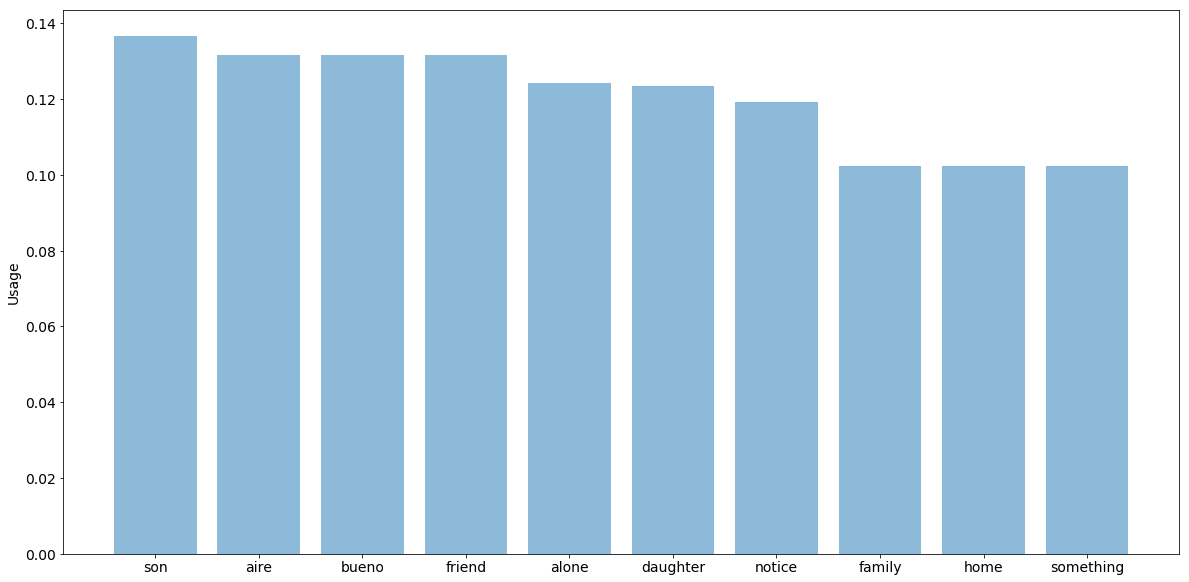

Australia
child                0.15646358308389524
cruise               0.1337010742248791
mother               0.11379169678828745
son                  0.10332545365345185
friend               0.09956773468975151
good                 0.09956773468975151
birth                0.09594506410677671
disneyland           0.0955280922428238
home                 0.09245575364048354
hospital             0.09245575364048354


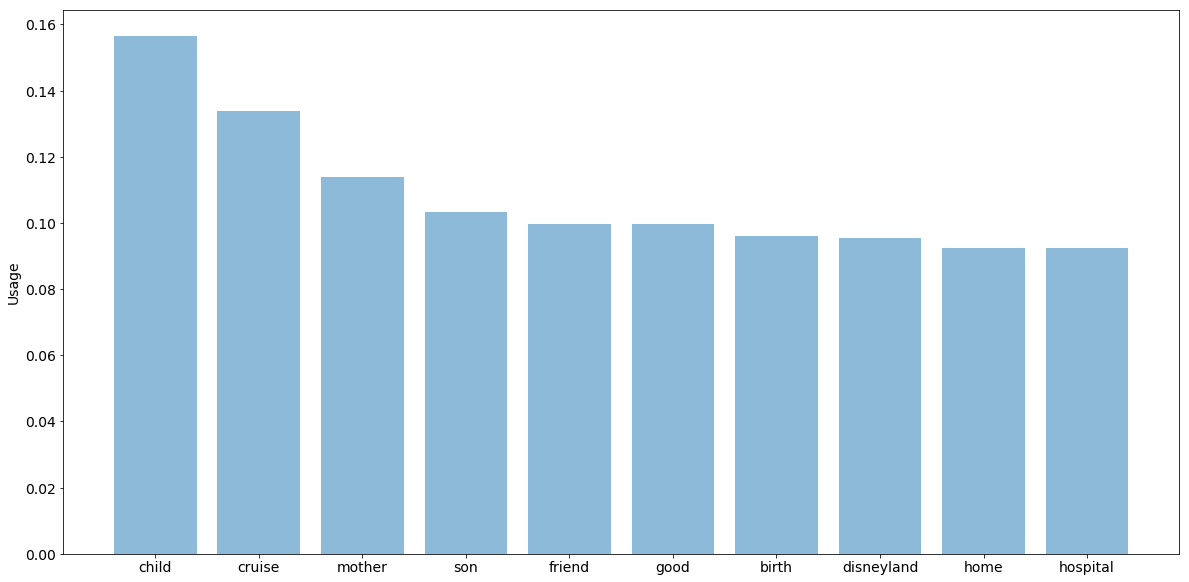

Austria
reverence            0.5217558450332507
statement            0.26314544432016956
child                0.11754565819962763
birth                0.11520509934342782
people               0.11101534385520387
grain                0.1043944075986145
stand                0.10219264428380577
think                0.08489408647750885
great                0.08439472962380164
vienna               0.0835155260788916


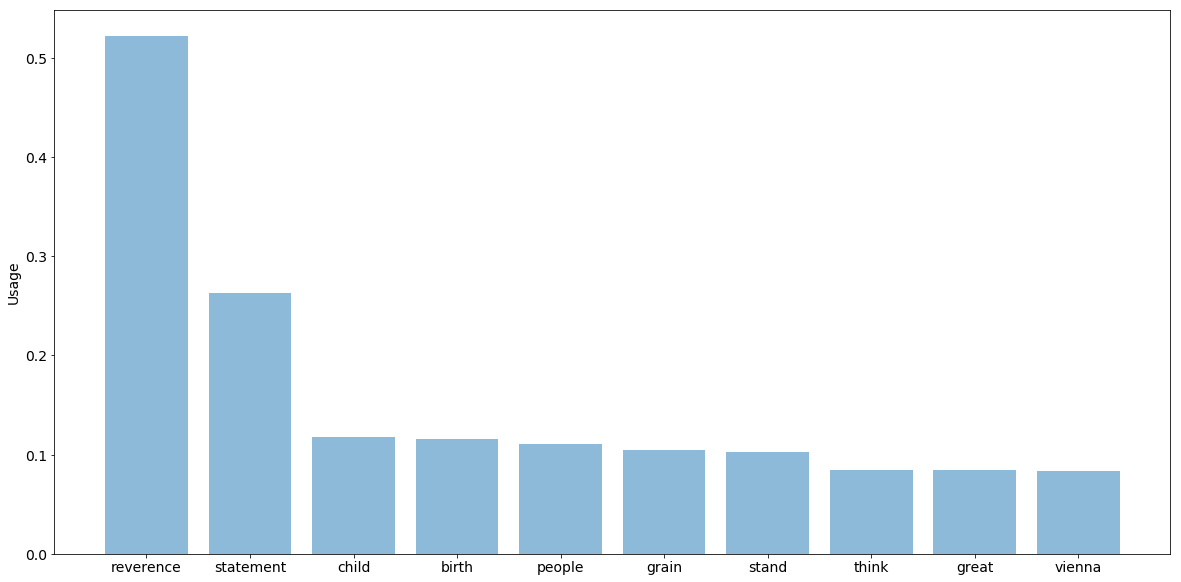

Brazil
sensation            0.2278240405686545
birth                0.1959216825867568
son                  0.172411080676346
home                 0.15858901204386455
daughter             0.13647653972678522
anxious              0.12678737124685296
happy                0.12199584823107883
leave                0.11755300955205408
friend               0.11327786574561755
enthusiastic         0.108827999602904


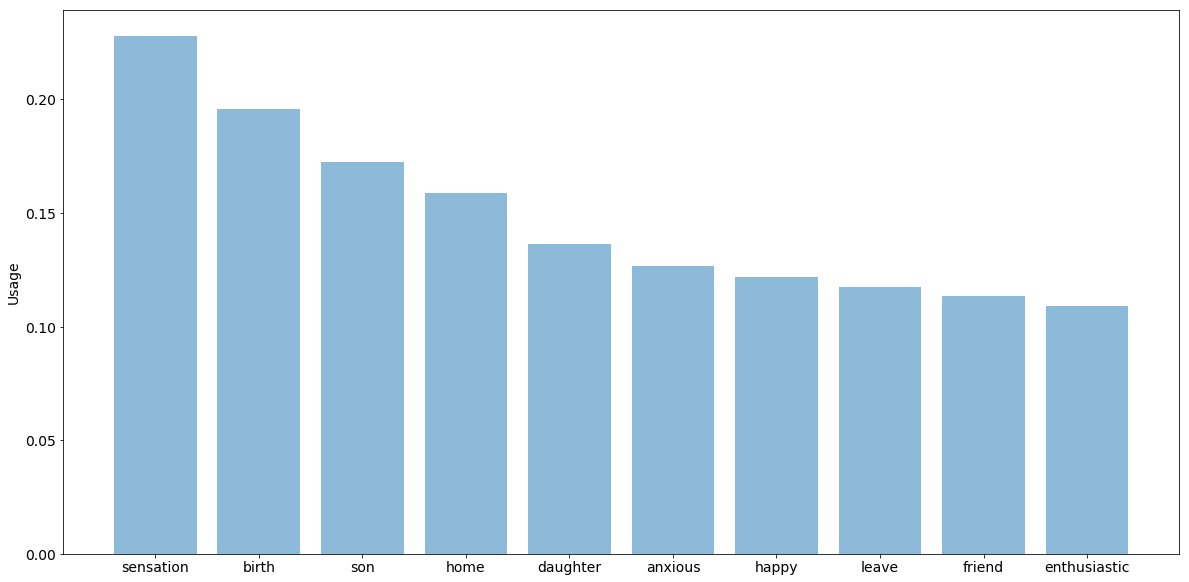

Canada
bear                 0.1533470083368075
daughter             0.137736642492877
pokemon              0.1372910254807172
barge                0.13305195031007977
family               0.12194535746813968
little               0.11926989537307249
son                  0.11072916334810122
great                0.10670594930174161
friend               0.10670218778462222
beautiful            0.09908060294286349


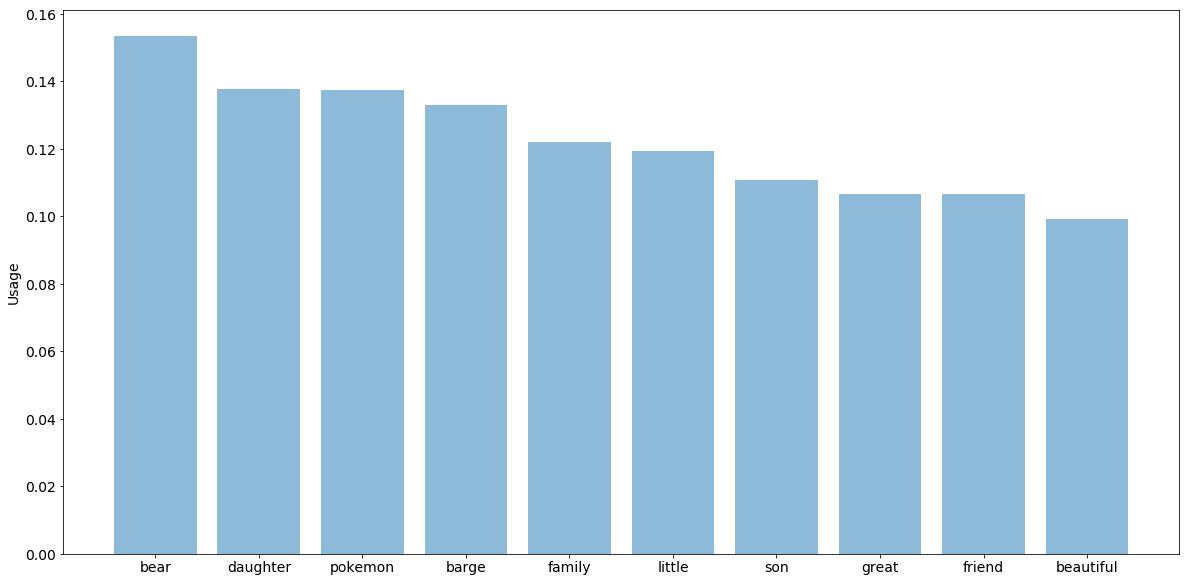

Chile
chile                0.28621528305332505
earthquake           0.1933053805970031
family               0.16411985027597756
cat                  0.16211432506127318
house                0.11247770852456873
start                0.11247770852456873
know                 0.11189989791543924
occur                0.10807621670751547
friend               0.10443990472107663
people               0.10443990472107663


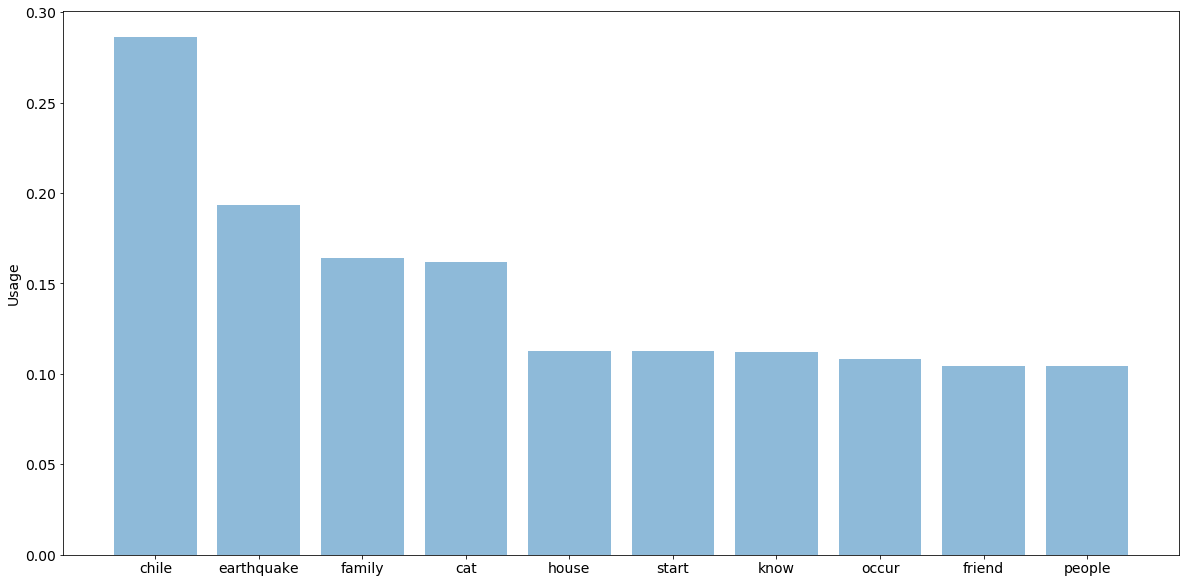

China
sense                0.27870526773873633
respect              0.19994460569294212
people               0.17784816984871513
chairman             0.1601829417722817
teacher              0.14466233092775754
flood                0.13650603925027674
fire                 0.12102212248415872
mao                  0.1144163869802012
watch                0.11433096633131687
classmate            0.11262338631210299


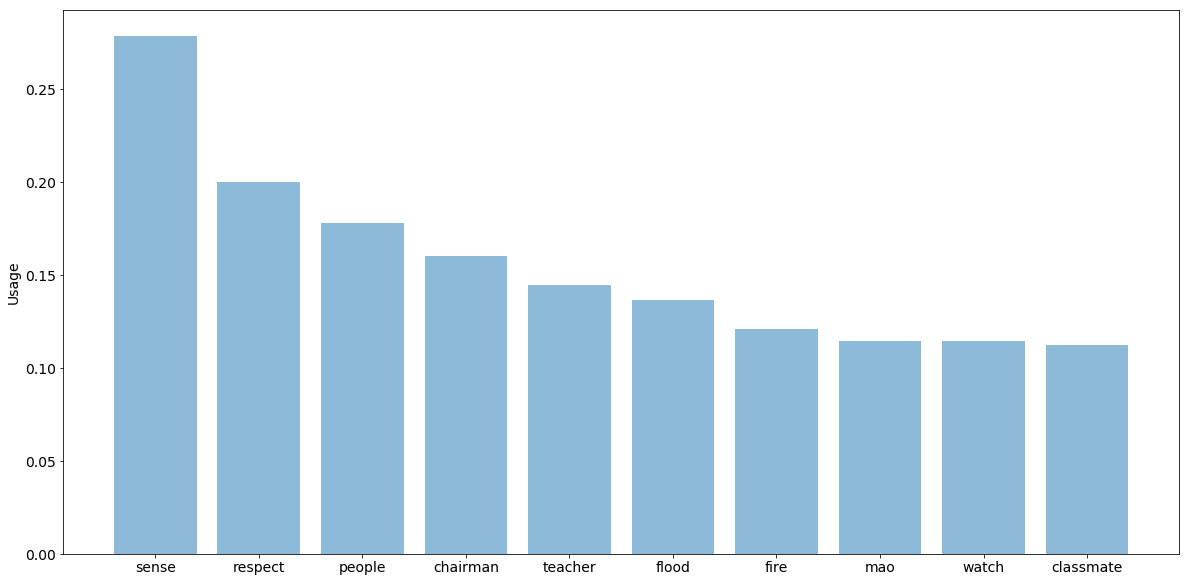

France
birth                0.26918937839856627
child                0.21307820519174653
landscape            0.16934138114870054
discover             0.16883737870148555
daughter             0.14510002625789306
wonderful            0.13393848577651668
back                 0.1153668764565284
meet                 0.10575297008515105
take                 0.10190696770040052
arm                  0.1001577169486387


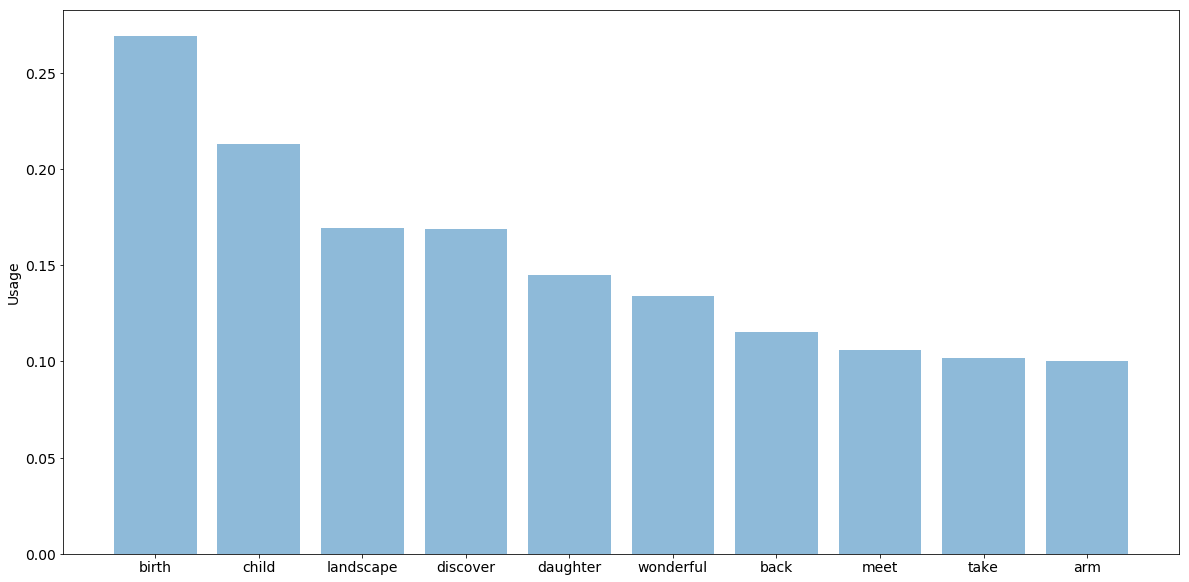

Germany
reverence            0.49274662637122835
reverent             0.11971662265577693
people               0.11233176127607461
well                 0.10879978553688958
situation            0.10484297719100297
long                 0.10102837228425461
great                0.09678154446122908
germany              0.09376247478382893
birth                0.09325695903161964
unfortunately        0.0829905301551423


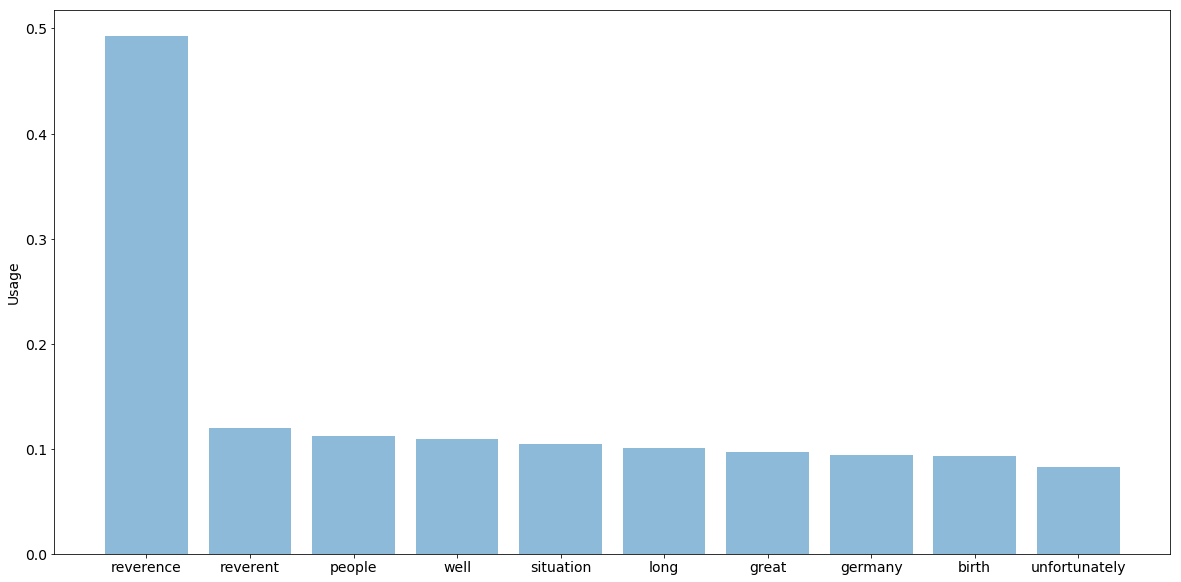

India
face_smile           0.1656239021597717
laugh_face           0.1656239021597717
surprised            0.14942196984619313
train                0.13963757977742922
expire               0.1380199184664764
smile_laugh          0.1380199184664764
thing                0.12721947030741293
friend               0.12259277863345766
suddenly             0.1155778240821962
goddess              0.11041593477318114


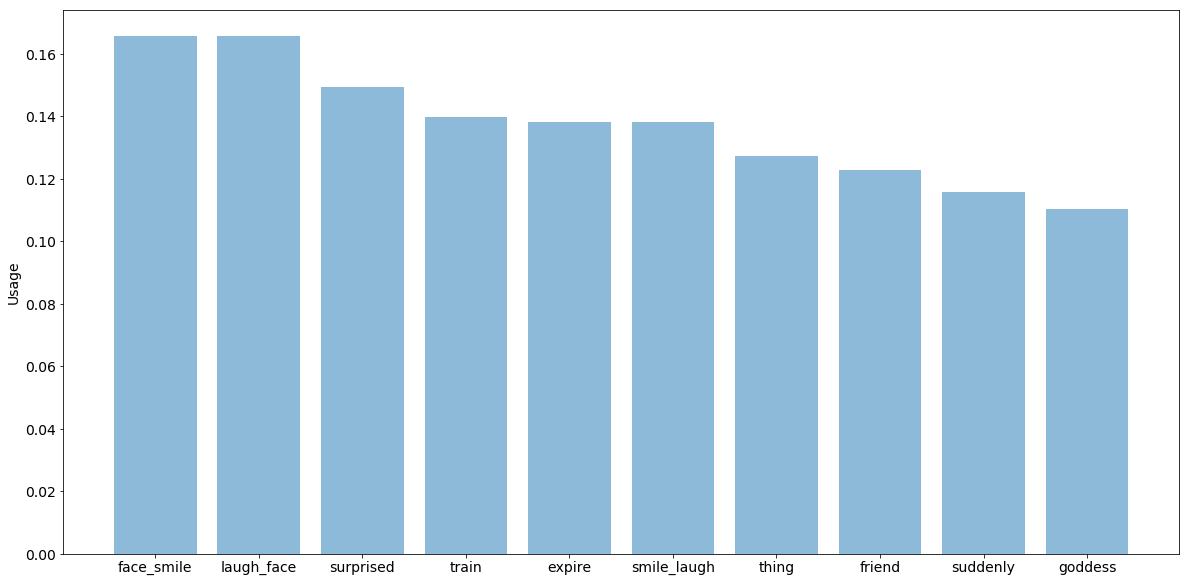

Indonesia
successful           0.16460494261063827
something            0.1561200700919046
businessman          0.14801372795025233
people               0.13968637850328305
truly                0.13392120897816687
family               0.1314695327089723
work                 0.1314695327089723
someone              0.12394663611498544
extraordinary        0.1234537069579787
thing                0.11937733149401548


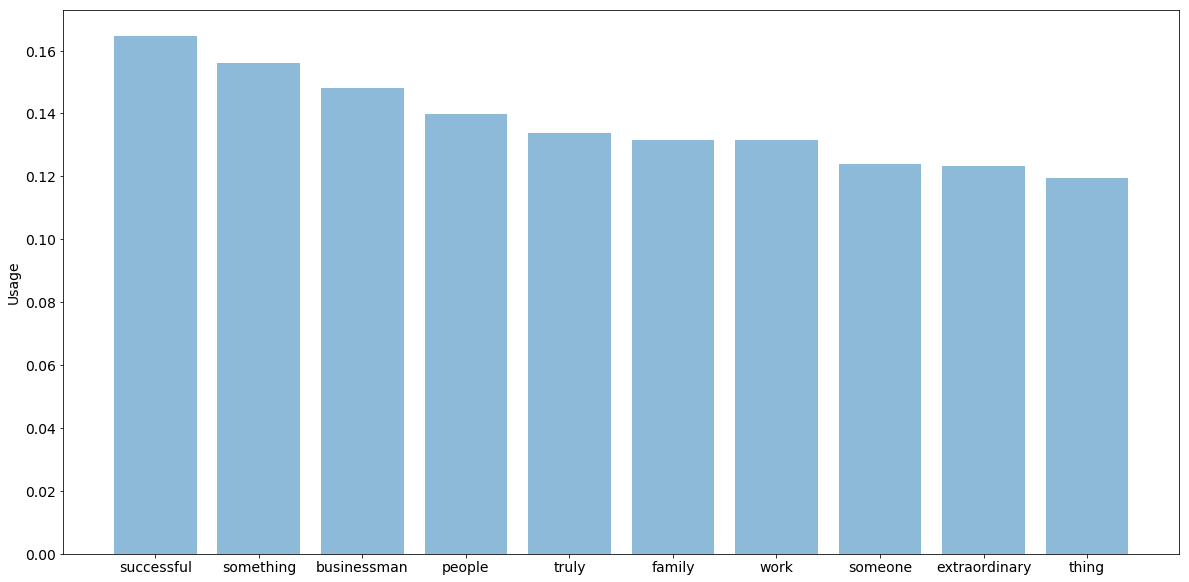

Ireland
child                0.19024606455502258
watch                0.1463431265807866
daughter             0.13223503592525998
ireland              0.13180721816707042
bet                  0.1282590804055809
know                 0.12439165759366862
take                 0.12439165759366862
bear                 0.1226848982076885
duck                 0.11697296025707908
birth                0.11389962313198561


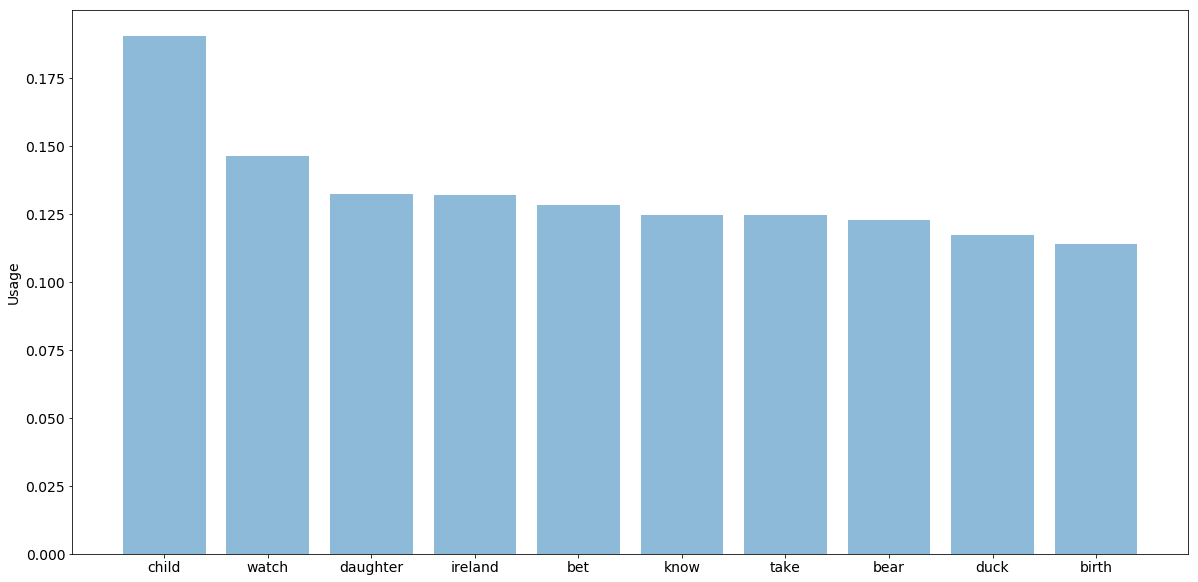

Japan
lecture              0.24976512135798346
high_school          0.180405899293074
encounter            0.1681048167812813
live                 0.1645332494023198
think                0.1645332494023198
earthquake           0.14258964830013787
deeply               0.12010139098789681
listen               0.09667386328559405
person               0.09650679332978306
teach                0.08956608496663097


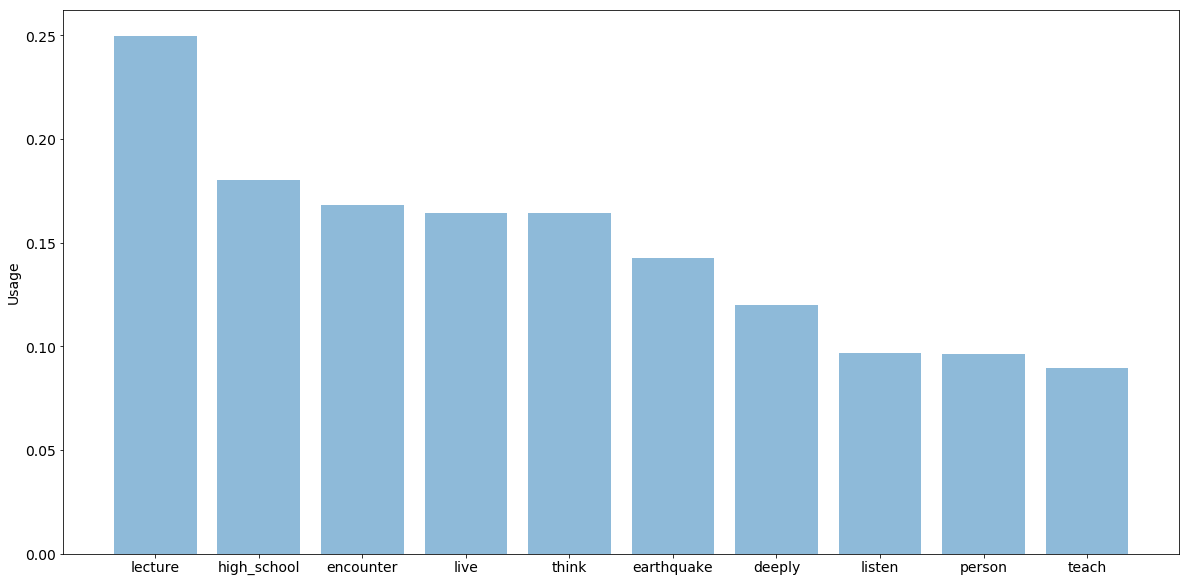

Korea
friend               0.1574364327307682
watch                0.1574364327307682
catch                0.13809042001611066
take                 0.12965353283710324
mountain             0.11820484019442501
trip                 0.11386926533575358
give                 0.1111315995746599
think                0.1111315995746599
child                0.10187063294343825
family               0.10187063294343825


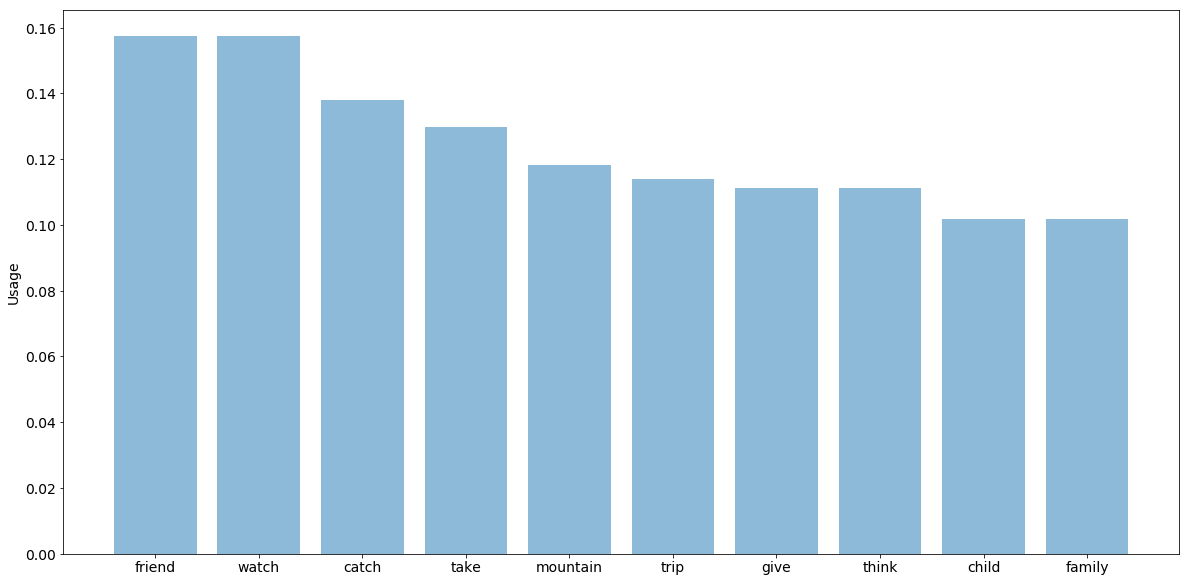

Mexico
tell                 0.15772110245824025
astonished           0.1348142105544689
work                 0.12904453837492386
friend               0.12187539735409475
astonishment         0.11792869215695015
think                0.11470625633326564
give                 0.10753711531243654
know                 0.10753711531243654
look                 0.10753711531243654
landlord             0.10331276163694891


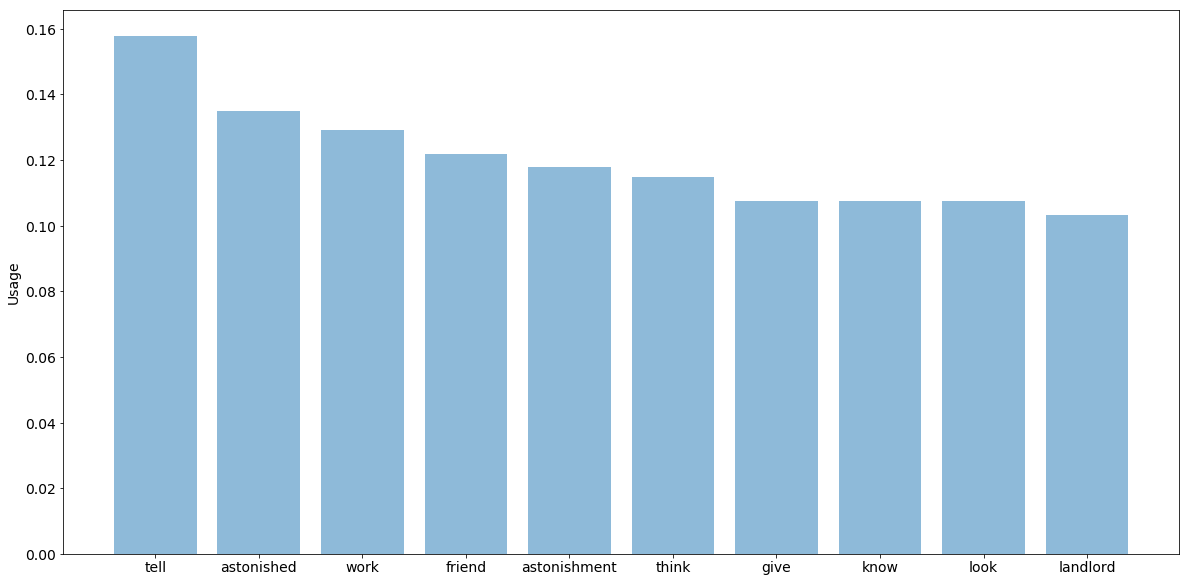

Netherlands
amsterdam            0.13116158996701155
take                 0.12307073225017806
tattoo               0.11823617537541439
think                0.10666130128348766
netherland           0.10492927197360923
love                 0.10217236964031116
look                 0.09845658580014245
something            0.09845658580014245
last                 0.09365800550361858
really               0.09365800550361858


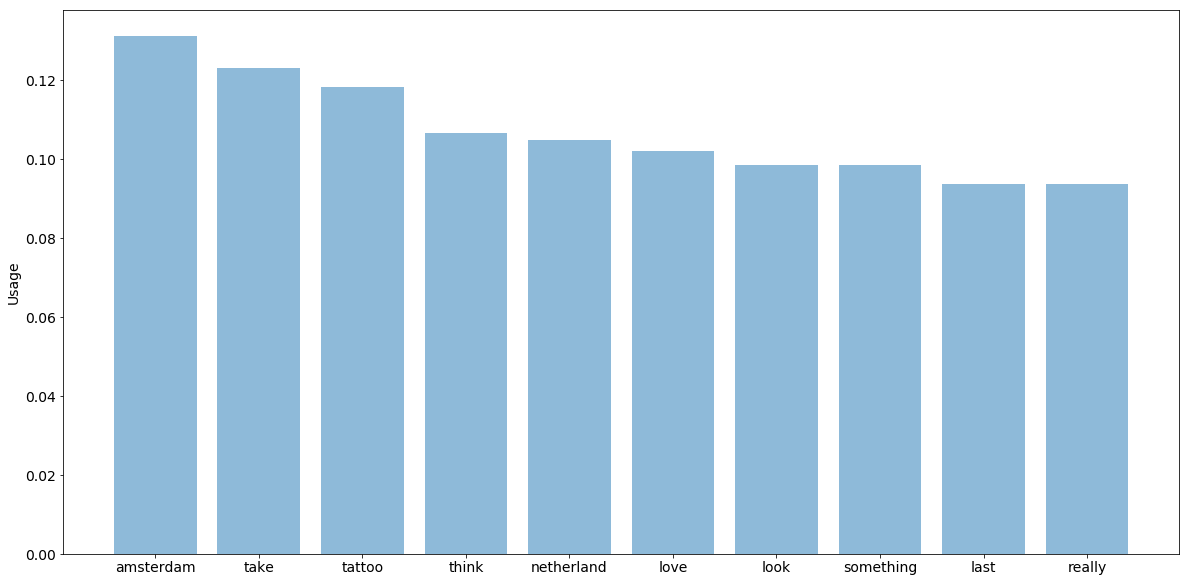

Norway
child                0.16152922215318335
people               0.16152922215318335
norwegian            0.13855706251169714
big                  0.13569674264728557
home                 0.12306988354528255
think                0.12306988354528255
give                 0.10768614810212224
take                 0.09999428038054207
norway               0.09837051410022093
incredibly           0.0968534887399062


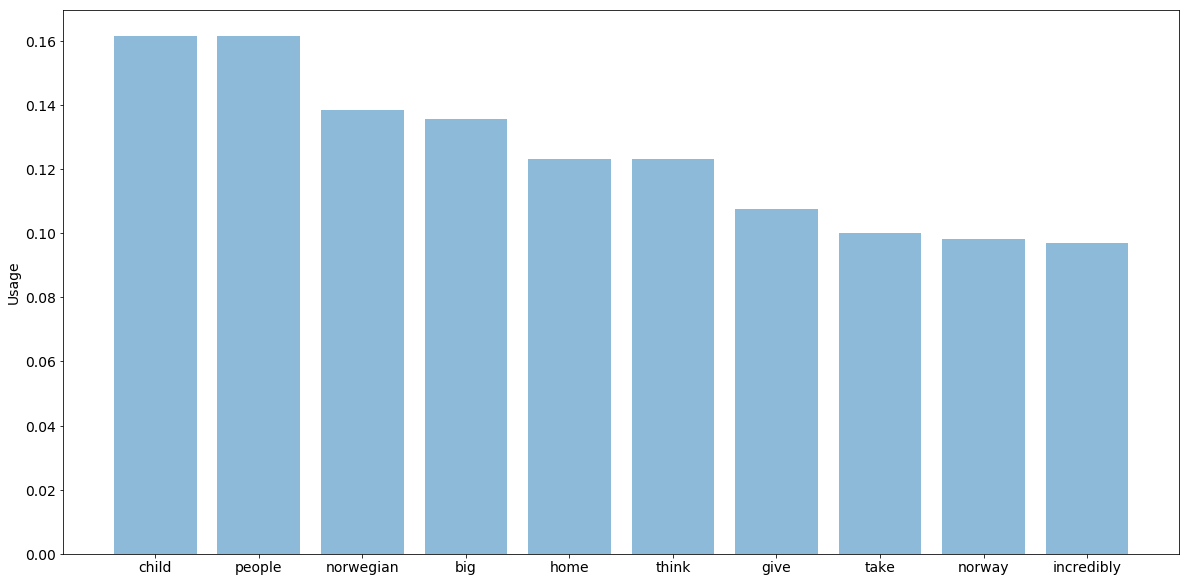

Russia
sublimity            0.4709441636973172
war                  0.12444403840886153
child                0.11764814189798992
holy                 0.11589101849696415
birth                0.11530554239535967
happiness            0.11482571414263998
favorite             0.10422327441312614
car                  0.10228174225894186
ninth                0.09418883273946345
church               0.09186131026187948


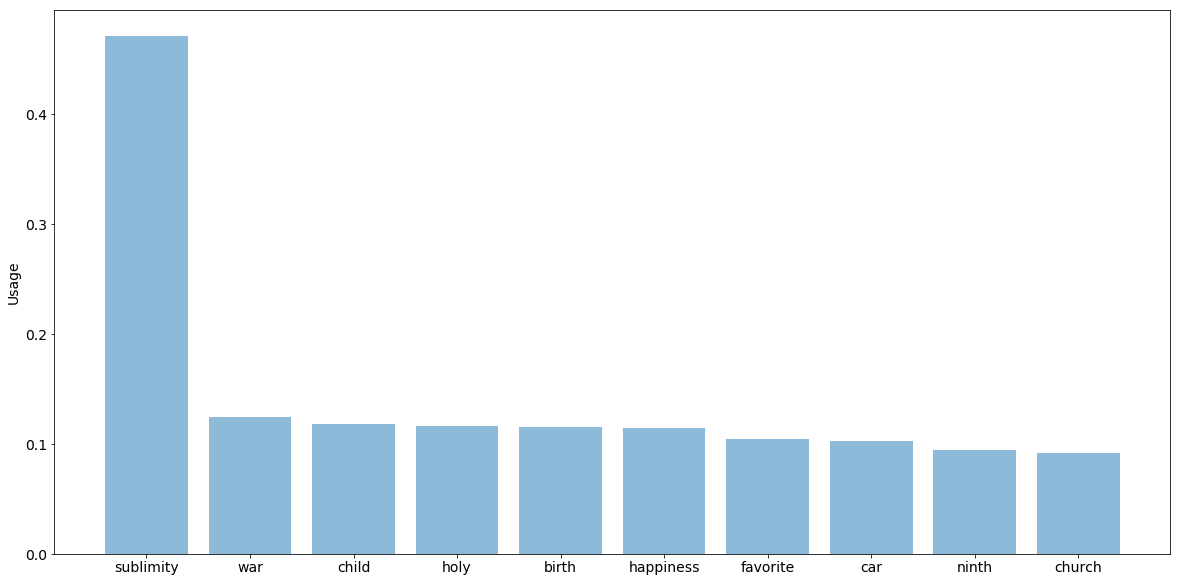

Singapore
cannot_recall        0.2589868688215556
singapore            0.22983916309780433
election             0.17380565708488294
wombat               0.1294934344107778
result               0.09714805820169901
give                 0.09345321381086232
work                 0.09345321381086232
toilet               0.09193566523912172
toy                  0.09193566523912172
china                0.09000541552303103


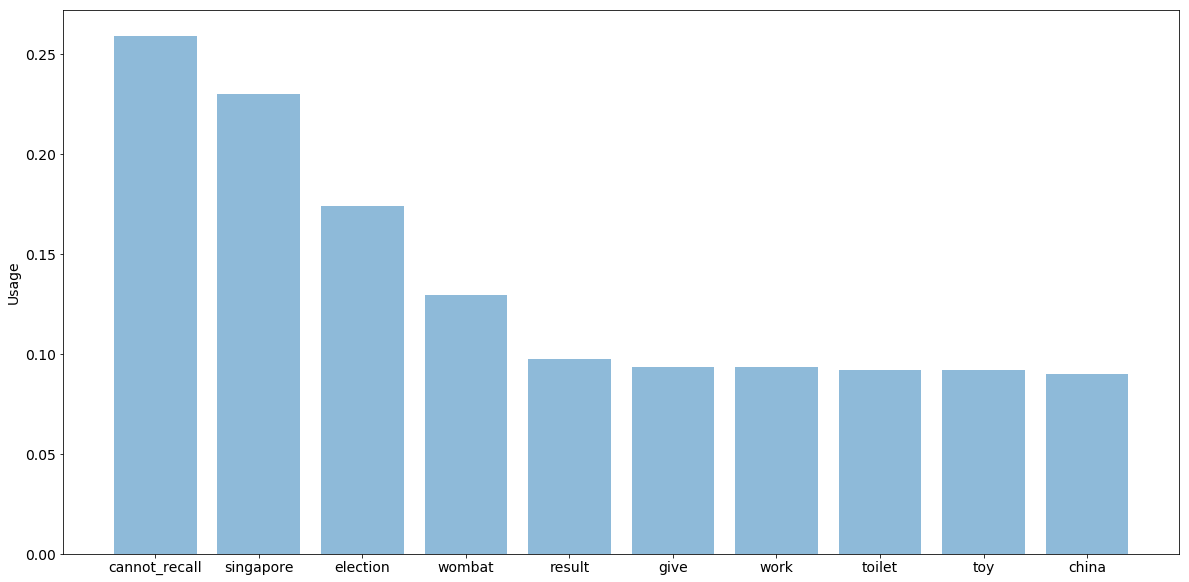

South_Africa
give                 0.10637480765612292
look                 0.10637480765612292
birth                0.1038959320340492
home                 0.10011746602929215
never                0.10011746602929215
take                 0.10011746602929215
cape                 0.10003063219046154
machine              0.09401320638992511
wedding              0.09401320638992511
watch                0.0938601244024614


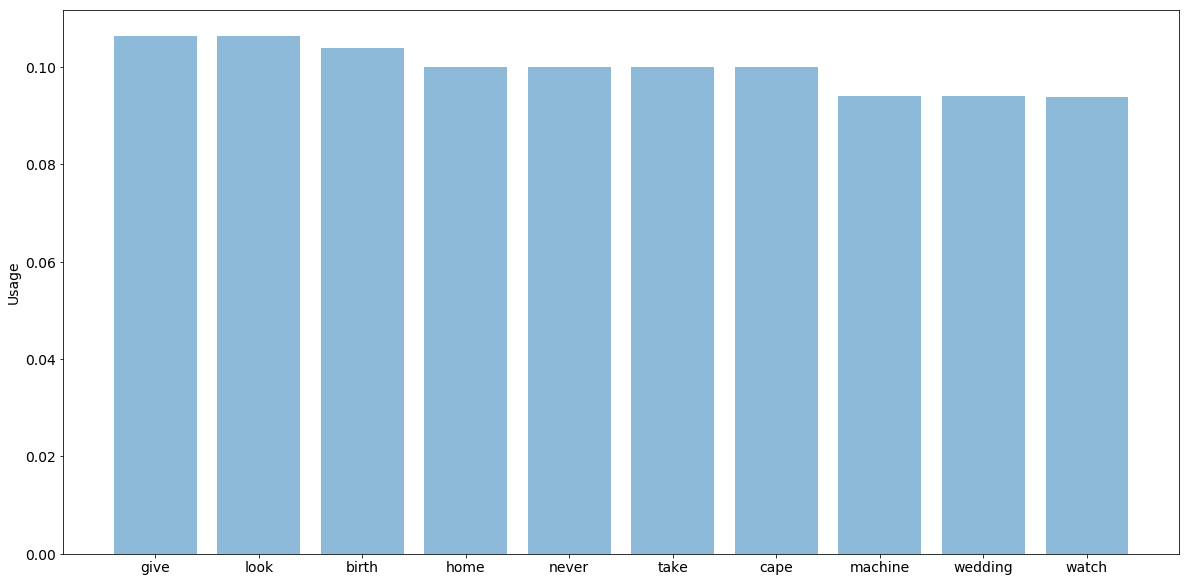

Spain
home                 0.2330118474471913
tell                 0.1792398826516856
surprise             0.15699981589980147
alone                0.12546791785617994
son                  0.12090289549686872
death                0.1133619304717557
daughter             0.10797360457103895
friend               0.10754392959101138
know                 0.10754392959101138
react                0.0993166094604167


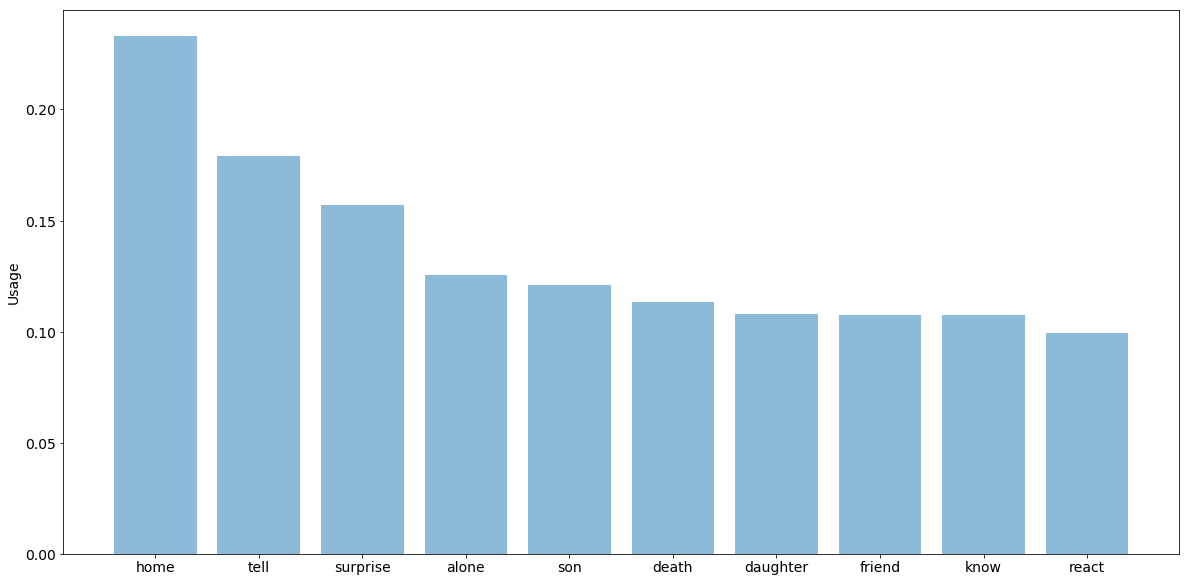

Sweden
friend               0.17188730669136046
really               0.12882594834920824
great                0.12341062184827506
child                0.1145915377942403
home                 0.10504224297805362
feelt                0.10320943781262996
son                  0.09909688334554481
bear                 0.09606635773213434
car                  0.09606635773213434
think                0.09549294816186693


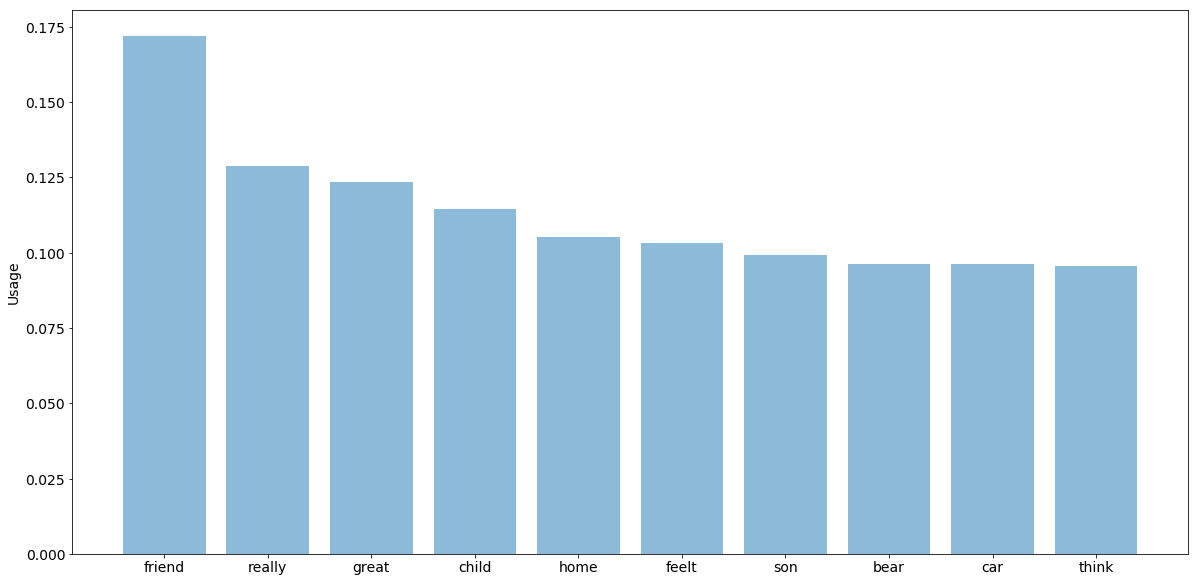

Switzerland
birth                0.2170373420056831
marvel               0.17979029943509892
reverence            0.17693045218412945
daughter             0.13102737974535156
take                 0.12548650340739412
encounter            0.11795363478941966
arm                  0.11305479702095195
child                0.10875496961974157
hospital             0.10875496961974157
meditation           0.10698894208482819


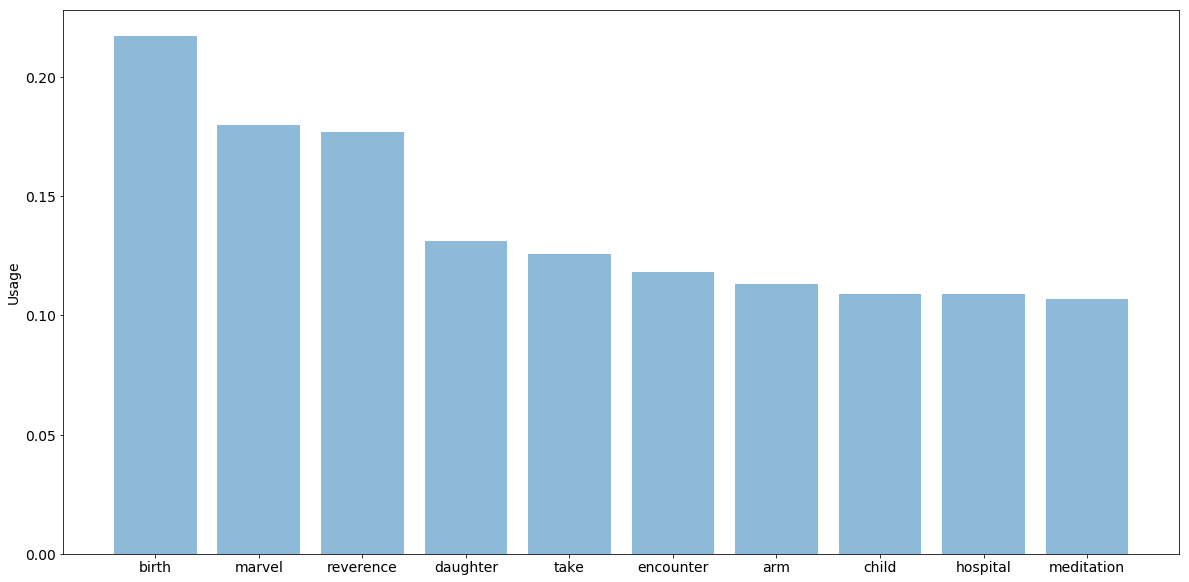

Turkey
allah                0.2505587994916125
home                 0.19591898647636335
peaceful             0.1954052665076724
happy                0.1265982693923516
dive                 0.1226490764086945
izmir                0.10587529676416679
creator              0.10526331205092845
prayer               0.10278949815067435
watch                0.09795949323818168
house                0.09494870204426369


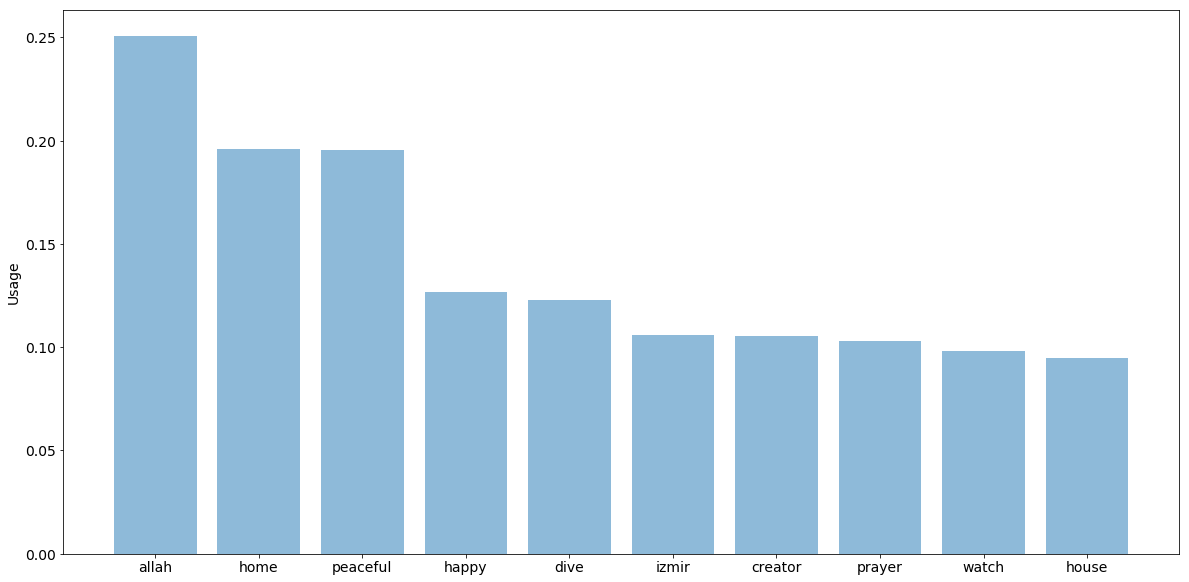

UK
mum                  0.15055281292764086
baby                 0.13237484408236222
watch                0.1255695864009441
birth                0.1140200458043379
inspire              0.1086734142771395
partner              0.10330932977511566
climb                0.09508923749249706
good                 0.09417718980070806
look                 0.09417718980070806
amazing              0.09297306734745821


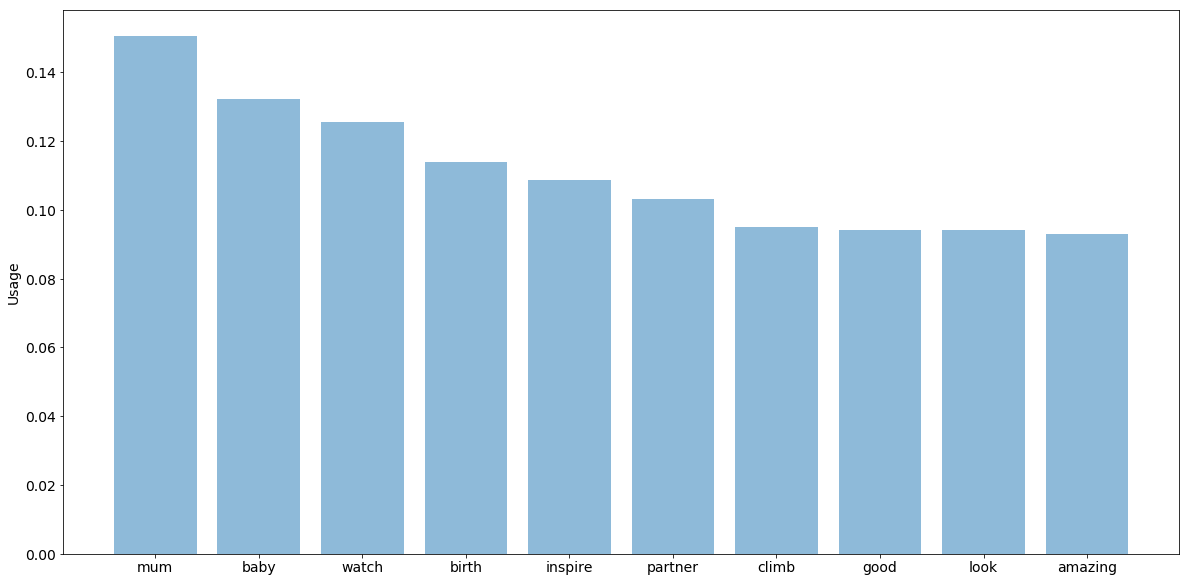

USA
child                0.21006923914318623
bear                 0.19724193873509785
give                 0.12604154348591173
birth                0.12207849983143206
take                 0.10923600435445684
husband              0.10463871414122747
know                 0.1008332347887294
happy                0.09954401005926088
bill                 0.09779286084093347
seat                 0.09311929588427234


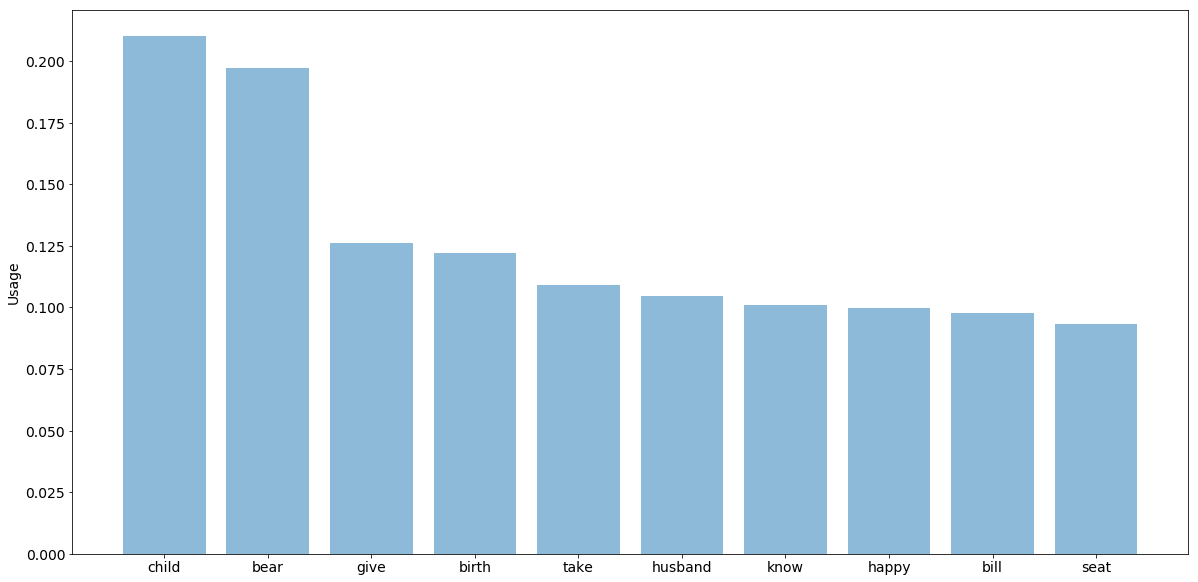

In [41]:
tf = TfidfVectorizer() #Create the model
result = tf.fit_transform(countryNarrative) #Get the raw result, a matrix whose rows represent each document, and columns represent words
names = tf.get_feature_names() #Get the word. It will have its id associated with its position in the document.
dense_result = result.todense() #to dense format for better processing.


matplotlib.rcParams.update({'font.size': 14})
if not os.path.exists('output'):
    os.mkdir('output')
outputPath = 'output/'

imgPath = outputPath + 'visualizations'
if not os.path.exists(imgPath):
    os.mkdir(imgPath)
imgPath += '/'

# The header of the table.
header = [None] * 3
header[0] = "Country"
header[1] = "Keyword"
header[2] = "TF-IDF Score"
overallList = list()
for i in range(0, len(countryList)):
    sentence = dense_result[i].tolist()[0] 
    word_score = [pair for pair in zip(range(0, len(sentence)), sentence) if pair[1] > 0]
    sorted_word_score = sorted(word_score, key=lambda t: t[1] * -1)
    sorted_word_score = sorted_word_score[:10]
    
    onelist = [None] * 11
    print(countryList[i])
    j = 0
    for phrase, score in [(names[word_id], score) for (word_id, score) in sorted_word_score]:
        print('{0: <20} {1}'.format(phrase, score))
        onelist[j] = [countryList[i], phrase, score]
        j += 1
    onelist[10] = []
    
    overallList += onelist
    with open(outputPath + countryList[i] + '.csv', 'w', newline='', encoding = 'utf-8') as f:
        writer = csv.writer(f)
        writer.writerows([header])
        for row in onelist:
            writer.writerows([row])
        
    y_axis = [None] * len(sorted_word_score)
    x_axis = [None] * len(sorted_word_score)
    k = 0
    for pair in sorted_word_score:
        y_axis[k] = names[pair[0]]
        x_axis[k] = pair[1]
        k += 1
    y_pos = np.arange(len(y_axis))
    plt.figure(figsize=(20,10))
    plt.bar(y_pos, x_axis, align='center', alpha = 0.5, tick_label = y_axis)
    plt.ylabel('Usage')
    plt.savefig(imgPath + countryList[i] + '.png')
    plt.show()
    print('========================================================')

overallPath = outputPath + 'overall'
if not os.path.exists(overallPath):
    os.mkdir(overallPath)
overallPath += '/'
with open(overallPath + 'overall.csv', 'w', newline='', encoding = 'utf-8') as f:
        writer = csv.writer(f)
        writer.writerows([header])
        for row in overallList:
            writer.writerows([row])

In [42]:
print(sorted_word_score)

[(1102, 0.21006923914318623), (607, 0.19724193873509785), (2629, 0.12604154348591173), (694, 0.12207849983143206), (6115, 0.10923600435445684), (3036, 0.10463871414122747), (3464, 0.1008332347887294), (2820, 0.09954401005926088), (682, 0.09779286084093347), (5441, 0.09311929588427234)]


In [43]:
a = []
type(a)

list

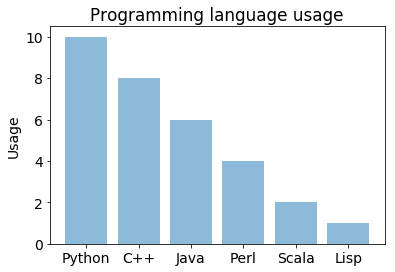

In [44]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()